In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import tree

In [42]:
X_train = np.zeros((11, 1))
X_test = np.zeros((101, 1))
y_train = np.zeros(11)
y_test = np.zeros(101)

In [43]:
X_train[:, 0] = range(0, 101, 10)
y_train = range(0, 101, 10)
X_test[:, 0] = range(0, 101, 1)
y_test = range(0, 101, 1)

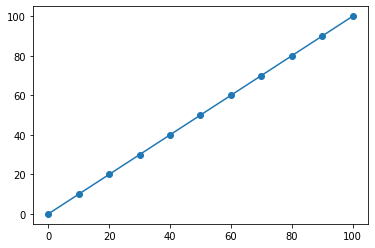

In [44]:
plt.plot(X_train[:,0], y_train, "o-")

In [45]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
pred_test = dtc.predict(X_test)

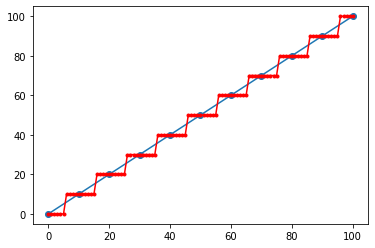

In [47]:
plt.plot(X_train[:,0], y_train, "o-")
plt.plot(X_test[:,0], pred_test, "r.-")

In [48]:
r2_score(y_test, pred_test)

0.9900990099009901

In [49]:
r2_score(y_train, dtc.predict(X_train))

1.0

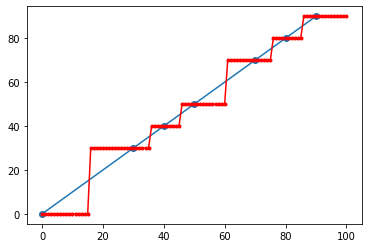

In [52]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True)
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_tr = X_train[train_index,:]
    X_val = X_train[test_index,:]
    y_tr = pd.DataFrame(y_train).loc[train_index]
    y_val = pd.DataFrame(y_train).loc[test_index]
    dtc.fit(X_tr, y_tr)
    pred_test = dtc.predict(X_test)
    plt.plot(X_tr[:,0], y_tr, "o-")
    plt.plot(X_test[:,0], pred_test, "r.-")
    plt.show()
    break

[Text(148.8, 195.696, 'X[0] <= 60.0\nmse = 840.816\nsamples = 7\nvalue = 51.429'),
 Text(74.4, 152.208, 'X[0] <= 15.0\nmse = 350.0\nsamples = 4\nvalue = 30.0'),
 Text(37.2, 108.72, 'mse = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(111.60000000000001, 108.72, 'X[0] <= 35.0\nmse = 66.667\nsamples = 3\nvalue = 40.0'),
 Text(74.4, 65.232, 'mse = 0.0\nsamples = 1\nvalue = 30.0'),
 Text(148.8, 65.232, 'X[0] <= 45.0\nmse = 25.0\nsamples = 2\nvalue = 45.0'),
 Text(111.60000000000001, 21.744, 'mse = 0.0\nsamples = 1\nvalue = 40.0'),
 Text(186.0, 21.744, 'mse = 0.0\nsamples = 1\nvalue = 50.0'),
 Text(223.20000000000002, 152.208, 'X[0] <= 75.0\nmse = 66.667\nsamples = 3\nvalue = 80.0'),
 Text(186.0, 108.72, 'mse = 0.0\nsamples = 1\nvalue = 70.0'),
 Text(260.40000000000003, 108.72, 'X[0] <= 85.0\nmse = 25.0\nsamples = 2\nvalue = 85.0'),
 Text(223.20000000000002, 65.232, 'mse = 0.0\nsamples = 1\nvalue = 80.0'),
 Text(297.6, 65.232, 'mse = 0.0\nsamples = 1\nvalue = 90.0')]

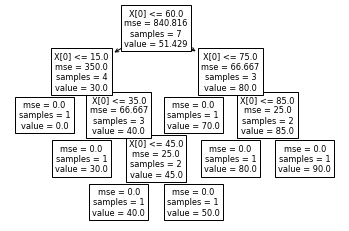

In [53]:
tree.plot_tree(dtc)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [60]:
df = pd.read_csv("fruits.csv", usecols=["weight", "color","target"])
le = preprocessing.LabelEncoder() 
df.color = le.fit_transform(df.color)
df.target = le.fit_transform(df.target)

In [61]:
X = df[["weight","color"]]
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [97]:
dtc = DecisionTreeClassifier(min_samples_split=500)

In [98]:
dtc.fit(X_train, y_train)
pred_train = dtc.predict_proba(X_train)[:, 1]
pred_test = dtc.predict_proba(X_test)[:, 1]
score_train = roc_auc_score(y_train, pred_train)
score_test = roc_auc_score(y_test, pred_test)
print(score_train, score_test)
#2 0.9618597923456943
#3 0.9852814376934589
#4 0.9896073555336901
#5 0.9897108111432261
#6 0.9882140679130025
#7 0.9875158226226348
#100 0.9275452001721912


0.9911679138746506 0.9898776853617038


[Text(167.4, 181.2, 'X[1] <= 1.5\ngini = 0.5\nsamples = 7500\nvalue = [3808, 3692]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\ngini = 0.42\nsamples = 4932\nvalue = [1478, 3454]'),
 Text(41.85, 36.23999999999998, 'gini = 0.17\nsamples = 1631\nvalue = [1478, 153]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3301\nvalue = [0, 3301]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 109.807\ngini = 0.168\nsamples = 2568\nvalue = [2330, 238]'),
 Text(209.25, 36.23999999999998, 'gini = 0.249\nsamples = 1633\nvalue = [1395, 238]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 935\nvalue = [935, 0]')]

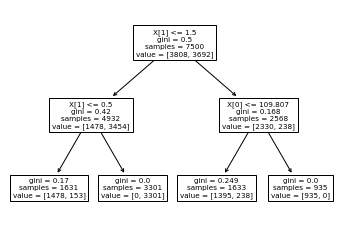

In [86]:
tree.plot_tree(dtc)

[Text(182.61818181818182, 199.32, 'X[1] <= 1.5\ngini = 0.5\nsamples = 7500\nvalue = [3808, 3692]'),
 Text(91.30909090909091, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.42\nsamples = 4932\nvalue = [1478, 3454]'),
 Text(60.872727272727275, 126.83999999999999, 'X[0] <= 90.0\ngini = 0.17\nsamples = 1631\nvalue = [1478, 153]'),
 Text(30.436363636363637, 90.6, 'gini = 0.0\nsamples = 614\nvalue = [614, 0]'),
 Text(91.30909090909091, 90.6, 'X[0] <= 109.777\ngini = 0.256\nsamples = 1017\nvalue = [864, 153]'),
 Text(60.872727272727275, 54.359999999999985, 'gini = 0.466\nsamples = 411\nvalue = [259, 152]'),
 Text(121.74545454545455, 54.359999999999985, 'X[0] <= 109.997\ngini = 0.003\nsamples = 606\nvalue = [605, 1]'),
 Text(91.30909090909091, 18.119999999999976, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(152.1818181818182, 18.119999999999976, 'gini = 0.0\nsamples = 600\nvalue = [600, 0]'),
 Text(121.74545454545455, 126.83999999999999, 'gini = 0.0\nsamples = 3301\nvalue = [0, 3301]'),
 Te

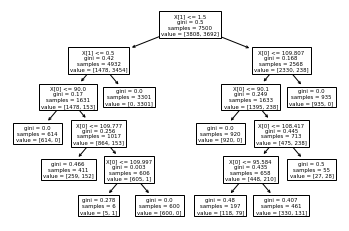

In [99]:
tree.plot_tree(dtc)

In [100]:
dtc.feature_importances_

array([0.06353978, 0.93646022])

In [112]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(DecisionTreeClassifier(min_samples_split=500), threshold = 0.01)
selector.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(min_samples_split=500),
                threshold=0.01)

In [113]:
selector.get_support()

array([ True,  True])

In [114]:
X_train.iloc[:, selector.get_support()]

,weight,color
6104,101.259336,2
3007,95.725227,2
5631,109.626240,1
1161,113.872880,2
6308,103.576332,1
...,...,...
964,94.322043,1
5941,91.730539,1
9359,108.592525,2
4373,64.581467,2


In [115]:
selector.transform(X_train)

array([[101.25933566,   2.        ],
       [ 95.7252269 ,   2.        ],
       [109.62624041,   1.        ],
       ...,
       [108.5925246 ,   2.        ],
       [ 64.58146664,   2.        ],
       [ 93.77874969,   2.        ]])